In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

In [89]:
사육비 = pd.read_excel('육우_두당_사육비_2008_2023_통계청.xlsx')
사육비

,비목별,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,비목별,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균,평균 (원)
1,비용합계,4034510,4305638,4324629,4812738,4895593,4752599,4606343,4580671,4493296,4802797,4995562,5118632,5362850,5666117,6177623,6211158
2,가축비,565535,445401,455460,431421,460657,311323,300822,472936,559246,526477,632795,746450,848523,1022505,779585,455744
3,사료비,2380471,2661585,2477290,2774360,2874190,2909513,2836632,2717761,2514845,2542519,2656056,2686411,2795241,2960578,3537031,3572594
4,농후사료,1974832,2162811,1923383,2242992,2276916,2360001,2254714,2209304,2074647,2092456,2171388,2146277,2232942,2389793,2813786,2770440
5,조사료,249335,281610,292526,335836,303934,338544,305945,272596,288970,284635,346696,368857,362707,370215,456467,537115
6,TMR사료,156304,217164,261380,195532,293340,210968,275973,235861,151228,165428,137972,171277,199592,200570,266778,265039
7,수도광열비,35761,34893,39374,49535,47612,43823,55807,54231,63710,84983,85569,85734,82420,82020,112844,150888
8,방역치료비,36497,30243,38275,40859,39944,30208,35059,33922,31293,39229,40016,40637,46724,41333,46176,45431
9,자동차비,-,-,-,-,-,-,25983,31743,35759,30882,38713,40403,43342,45861,48566,73980


In [90]:
사육비.drop(range(4,37), inplace=True)
사육비.drop(0, inplace=True)
사육비=사육비.T
사육비.columns = 사육비.loc['비목별']
사육비.drop("비목별", inplace=True)
# 사육비=사육비.astype({'비용합계': int, '가축비': int, '사료비': int})
사육비.insert(0, 'Index', 사육비.index)
사육비.reset_index(drop=True, inplace=True)
사육비.rename(columns={'Index':'년'}, inplace=True)
사육비=사육비.astype({'년':int, '비용합계': int, '가축비': int, '사료비': int})
사육비

비목별,년,비용합계,가축비,사료비
0,2008,4034510,565535,2380471
1,2009,4305638,445401,2661585
2,2010,4324629,455460,2477290
3,2011,4812738,431421,2774360
4,2012,4895593,460657,2874190
5,2013,4752599,311323,2909513
6,2014,4606343,300822,2836632
7,2015,4580671,472936,2717761
8,2016,4493296,559246,2514845
9,2017,4802797,526477,2542519


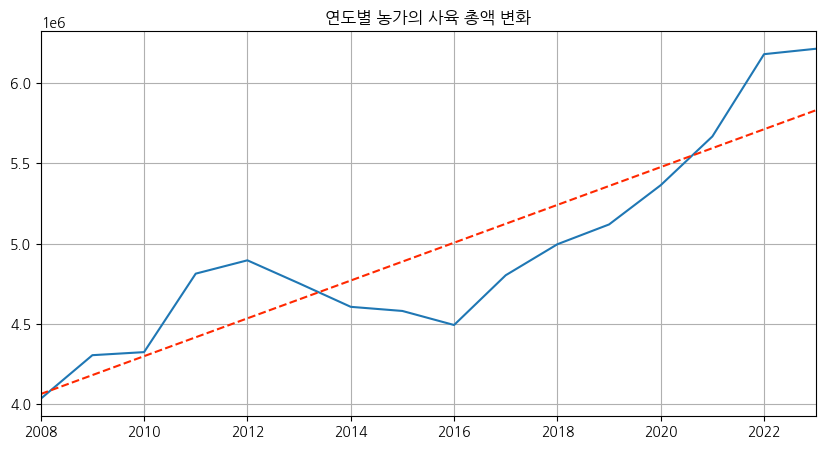

In [91]:
palette = sns.color_palette("gist_rainbow", len(사육비))
plt.figure(figsize=(10,5))
plt.plot(사육비['년'], 사육비['비용합계'])

z = np.polyfit(사육비['년'], 사육비['비용합계'], 1)
p = np.poly1d(z)
plt.plot(사육비['년'], p(사육비['년']), '--', color=palette[0])

plt.title('연도별 농가의 사육 총액 변화')
plt.xlim(2008,2023)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid()
plt.show()

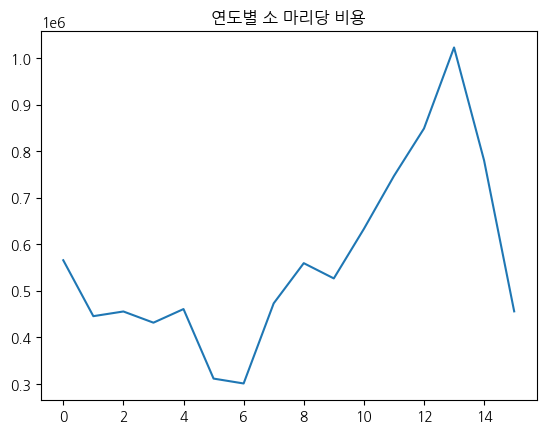

In [92]:
plt.plot(사육비.index, 사육비['가축비'])
plt.title('연도별 소 마리당 비용')
plt.show()

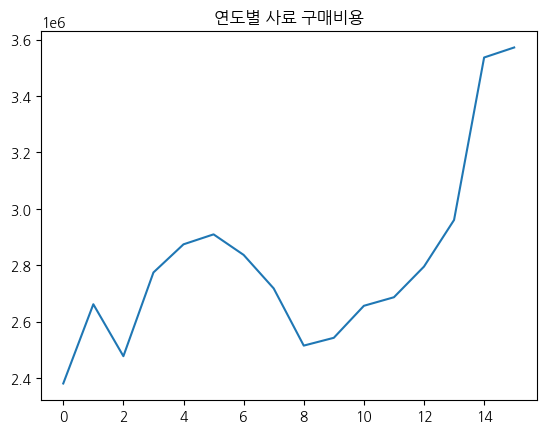

In [93]:
plt.plot(사육비.index, 사육비['사료비'])
plt.title('연도별 사료 구매비용')
plt.show()